In [2]:
# Importing tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from tqdm import tqdm
import math
from tensorflow.keras import regularizers

In [9]:
# Loading Data

data = pd.read_csv("train.csv", delimiter=",")
test = pd.read_csv("test.csv", delimiter=",")
submission = pd.read_csv("sample_submission.csv", delimiter=",")

In [15]:
# Training Data

X = data.loc[:, data.columns != "label"]
y = data["label"]

# Transforming the dataframes to arrays
X_train = X.to_numpy()
y_train = y.to_numpy()

In [22]:
# Testing Data

X_test = test.to_numpy()

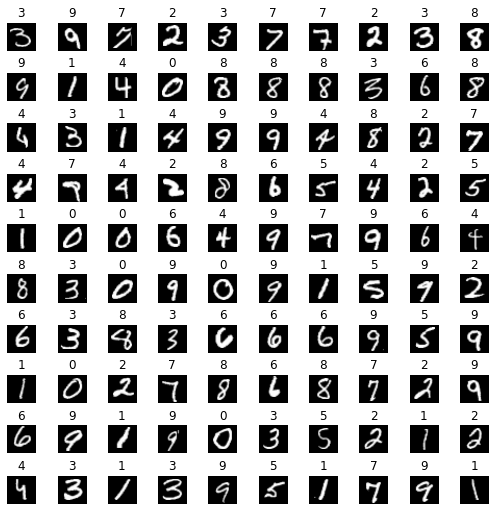

In [27]:
# Visualizing Data

X = X_train
y = y_train

m, n = X.shape

# Create a figure and a set of subplots
fig, axes = plt.subplots(10, 10, figsize=(7, 7))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # Select a random index
    r = np.random.randint(m)

    # Reshape the array and transpose 
    X_reshaped = X[r].reshape((28,28))

    # Plot the image 
    ax.imshow(X_reshaped, cmap="gray")

    # Setting the label
    ax.set_title(y[r])
  
    # Removing the axes to get a cleaner figure
    ax.set_axis_off()

In [33]:
model = keras.Sequential(
    [
      layers.InputLayer(input_shape = (784,)),
      layers.Dense(128, activation = "relu", name = "layer1"),
      layers.Dense(64, activation = "relu", name = "layer2"),
      layers.Dense(32, activation = "relu", name = "layer3"),
      layers.Dense(10, activation = "linear", name = "layer4")
    ]
)

# Configuring the model

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = tf.keras.metrics.SparseCategoricalAccuracy()
)

# Model summary
model.summary()

# Training the model 

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = 64,
    epochs = 50
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 layer4 (Dense)              (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
525/525 [==============================] - 2s 4ms/step - loss: 1.8156 - sparse_categorical_accuracy: 0.7454 - val_loss: 0.5583 - val_sparse_categorical_accuracy: 0.8606


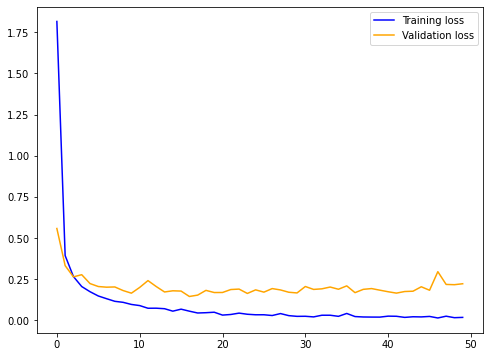

In [34]:
# Learning curves

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(history.history['loss'], label="Training loss", color='blue')
ax.plot(history.history['val_loss'], label="Validation loss", color='orange')
plt.legend()
plt.show()

In [ ]:
# Verifiying predictions

m, n = X_test.shape

fig, axes = plt.subplots(10,10, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

h = []
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_test[random_index].reshape(1,784))
    yhat = np.argmax(prediction)
    
    h.append(yhat)
    
    # Display the label above the image
    ax.set_title(f"{yhat}")
    ax.set_axis_off()

fig.suptitle("Predictions on test set", fontsize=16)
plt.show()

In [ ]:
# Generating the prediction submission


for i in range(len(X_test)):
    prediction = model.predict(X_test[i].reshape(1,784))
    submission['Label'][i] = np.argmax(prediction)